<a href="https://colab.research.google.com/github/simmy4946/NEW-REPOSITS-LaTesT-PrOjeCtS-/blob/main/EV_data_(final).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORT LIBRARIES

In [451]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes = True)
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

Distribution of Electric Range:
What is the distribution of electric range among the electric vehicles?
Are there any outliers in the electric range?

Distribution of Base MSRP:
What is the distribution of base MSRP (Manufacturer's Suggested Retail Price) among electric vehicles?
Are there any noticeable patterns or outliers in the base MSRP?

Correlation between Electric Range and Base MSRP:
Is there any correlation between electric range and base MSRP?
Visualize the relationship between electric range and base MSRP, perhaps using a scatter plot.

Electric Vehicle Types:
What are the different types of electric vehicles present in the dataset?
How many vehicles belong to each type?
Is there any relationship between electric vehicle type and electric range or base MSRP?

CAFV Eligibility:
How many vehicles are eligible for the Clean Alternative Fuel Vehicle (CAFV) program?
Is there any difference in electric range or base MSRP between eligible and non-eligible vehicles?

Trends over Model Years:
How has electric range and base MSRP changed over different model years?
Visualize trends in electric range and base MSRP over time, perhaps using line plots or bar plots.

Top Manufacturers:
Which manufacturers have the most electric vehicles in the dataset?
Are there any manufacturers that dominate the market in terms of electric range or base MSRP?

Geographical Analysis (using 'State' column):
Which states have the highest number of electric vehicles registered?
Is there any geographical pattern in electric range or base MSRP?

Vehicle Models:
What are the most popular electric vehicle models in the dataset?
How does electric range and base MSRP vary across different vehicle models?

Comparison with Conventional Vehicles (if applicable):
Are there any differences in base MSRP between electric vehicles and conventional vehicles?
How does electric range compare to the range of conventional vehicles?

# IMPORT DATA AND CHECK THE INFO

In [452]:
# Import data
ev_data = pd.read_csv("/content/Electric_Vehicle_Population_Data.csv")


In [453]:
# see the top 3 heads
ev_data.head(3)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10


In [454]:
# see the columns
ev_data.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [455]:
# see the size of data
ev_data.size

3023722

In [456]:
# get the info
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [457]:
# see the description of data
ev_data.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,177861.000000,177866.000000,177866.000000,177866.000000,177477.000000,1.778660e+05,1.778610e+05
mean,98172.453506,2020.515512,58.842162,1073.109363,29.127481,2.202313e+08,5.297672e+10
std,2442.450668,2.989384,91.981298,8358.624956,14.892169,7.584987e+07,1.578047e+09
min,1545.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2019.000000,0.000000,0.000000,18.000000,1.814743e+08,5.303301e+10
50%,98122.000000,2022.000000,0.000000,0.000000,33.000000,2.282522e+08,5.303303e+10
75%,98370.000000,2023.000000,75.000000,0.000000,42.000000,2.548445e+08,5.305307e+10
max,99577.000000,2024.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


# NULL VALUES TREATMENT

In [458]:
# check the null values , there is null values present in data
ev_data.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [459]:
# drop the columns which we dont require
ev_data.drop(['County','City','Postal Code','Legislative District','DOL Vehicle ID'],axis=1, inplace=True)


In [460]:
# drop the columns
ev_data.drop(['Vehicle Location','Electric Utility','2020 Census Tract','VIN (1-10)'],axis=1, inplace=True)


In [461]:
#ev_data.drop(['County','City','Postal Code','Legislative District','Vehicle Location','Electric Utility','2020 Census Tract','VIN (1-10)'],axis=1, inplace=True)

In [462]:
ev_data.head(2)

,State,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP
0,WA,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0
1,WA,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0


In [463]:
ev_data.isnull().sum()

State                                                0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
dtype: int64

In [464]:
#ev_data.drop(columns='2020 Census Tract', inplace=True)


In [465]:
# see the dtypes
ev_data.dtypes

State                                                object
Model Year                                            int64
Make                                                 object
Model                                                object
Electric Vehicle Type                                object
Clean Alternative Fuel Vehicle (CAFV) Eligibility    object
Electric Range                                        int64
Base MSRP                                             int64
dtype: object

In [466]:
# check the columns
ev_data.columns

Index(['State', 'Model Year', 'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP'],
      dtype='object')

# CHECK DUPLICATES IN DATA

In [467]:
# see the duplicates in data
#dol_duplicates = ev_data.duplicated(subset=['DOL Vehicle ID'], keep=False)
#dol_duplicates

In [468]:
# see decription again
ev_data.describe(include='all')

,State,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP
count,177866,177866.000000,177866,177866,177866,177866,177866.000000,177866.000000
unique,46,NaN,40,139,2,3,NaN,NaN
top,WA,NaN,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,NaN,NaN
freq,177477,NaN,79659,35989,139210,91950,NaN,NaN
mean,NaN,2020.515512,NaN,NaN,NaN,NaN,58.842162,1073.109363
std,NaN,2.989384,NaN,NaN,NaN,NaN,91.981298,8358.624956
min,NaN,1997.000000,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,2019.000000,NaN,NaN,NaN,NaN,0.000000,0.000000
50%,NaN,2022.000000,NaN,NaN,NaN,NaN,0.000000,0.000000
75%,NaN,2023.000000,NaN,NaN,NaN,NaN,75.000000,0.000000


#INSIGHTS

Graphical and Non Graphical Analysis

**How does the distribution of electric vehicles vary across states?**

In [469]:
state_counts= ev_data['State'].value_counts()
state_counts

State
WA    177477
CA       101
VA        46
MD        31
TX        23
NC        16
IL        15
CO        12
FL        10
AZ        10
HI         9
NV         8
NJ         8
NY         7
SC         7
CT         6
AL         6
GA         6
MA         5
OR         5
MO         5
PA         4
LA         4
OH         4
BC         3
ID         3
KY         3
DC         3
IN         3
UT         3
MI         2
RI         2
AR         2
WY         2
KS         2
MN         2
NE         2
DE         1
OK         1
AK         1
AE         1
IA         1
NH         1
TN         1
NM         1
AP         1
Name: count, dtype: int64

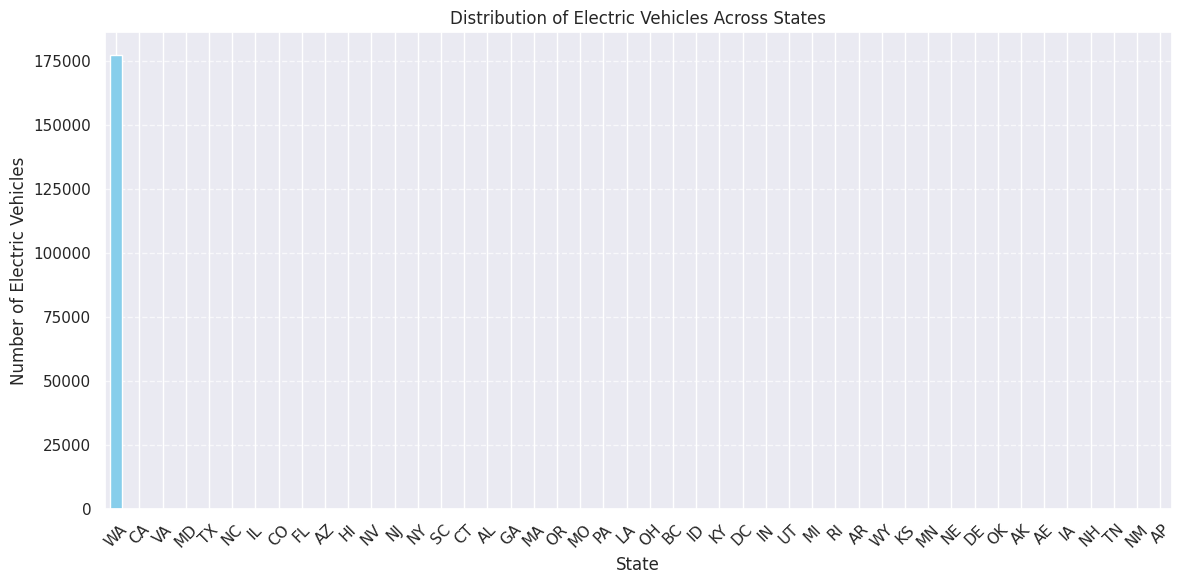

In [470]:
plt.figure(figsize=(12, 6))
state_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Electric Vehicles Across States')
plt.xlabel('State')
plt.ylabel('Number of Electric Vehicles')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

###This box plot that shows the distribution of base MSRP values across different states, 175000 is the highest no of electric vehicles in the WA state only and the lowest in AP and some others have too.

In [471]:
ev_data['Make'].value_counts()

Make
TESLA                   79659
NISSAN                  13998
CHEVROLET               13678
FORD                     9199
BMW                      7570
KIA                      7432
TOYOTA                   6288
VOLKSWAGEN               5004
JEEP                     4480
HYUNDAI                  4406
RIVIAN                   4312
VOLVO                    4133
AUDI                     3646
CHRYSLER                 2993
MERCEDES-BENZ            1589
PORSCHE                  1139
MITSUBISHI                958
MINI                      898
POLESTAR                  882
HONDA                     833
SUBARU                    831
FIAT                      784
DODGE                     568
MAZDA                     476
CADILLAC                  382
LEXUS                     370
SMART                     270
LINCOLN                   267
LUCID                     240
JAGUAR                    232
GENESIS                   182
LAND ROVER                 56
FISKER                     49
ALFA 

#Tesla has a highest value count

**Which manufacturers have the most electric vehicles represented in the dataset?**

In [472]:
manufacturer_counts=ev_data['Make'].value_counts()
manufacturer_counts.head(10)

Make
TESLA         79659
NISSAN        13998
CHEVROLET     13678
FORD           9199
BMW            7570
KIA            7432
TOYOTA         6288
VOLKSWAGEN     5004
JEEP           4480
HYUNDAI        4406
Name: count, dtype: int64

## Tesla is the highest number of manufacturer.

In [473]:
ev_data['Model Year'].value_counts()

Model Year
2023    57587
2022    27776
2021    19132
2018    14323
2020    11768
2019    10940
2017     8562
2024     7080
2016     5483
2015     4844
2013     4409
2014     3509
2012     1618
2011      775
2010       23
2008       20
2000        7
1999        5
2002        2
1998        1
1997        1
2003        1
Name: count, dtype: int64

Highest number of vehicles manufactured in model year =2023

**What are the most popular electric vehicle models?**

In [474]:
model_counts=ev_data['Model'].value_counts()

In [475]:
model_counts.head(10)

Model
MODEL Y           35989
MODEL 3           30092
LEAF              13366
MODEL S            7735
BOLT EV            6821
MODEL X            5796
VOLT               4796
ID.4               3937
WRANGLER           3392
MUSTANG MACH-E     3322
Name: count, dtype: int64

##MODEL Y is the most popular electric vehicle model.

In [476]:
#Check the dtypes
ev_data.dtypes

State                                                object
Model Year                                            int64
Make                                                 object
Model                                                object
Electric Vehicle Type                                object
Clean Alternative Fuel Vehicle (CAFV) Eligibility    object
Electric Range                                        int64
Base MSRP                                             int64
dtype: object

**What is the range of model years represented in the dataset?**

In [477]:
min_model_year= ev_data['Model'].value_counts()
max_model_year= ev_data['Model'].value_counts()

In [478]:
min_model_year.sort_values(ascending= True).reset_index()


,Model,count
0,BENTAYGA,1
1,918,1
2,SPECTRE,1
3,S-10 PICKUP,1
4,745LE,2
...,...,...
134,BOLT EV,6821
135,MODEL S,7735
136,LEAF,13366
137,MODEL 3,30092


In [479]:
max_model_year.sort_values(ascending= False).reset_index()


,Model,count
0,MODEL Y,35989
1,MODEL 3,30092
2,LEAF,13366
3,MODEL S,7735
4,BOLT EV,6821
...,...,...
134,745LE,2
135,918,1
136,S-10 PICKUP,1
137,SPECTRE,1


higest in Model Y however , lowest in BENTAYGA.

**Is there a trend in the number of electric vehicles produced over the years?**

In [480]:
yearly_counts = ev_data['Model Year'].value_counts()
yearly_counts.sort_index()

Model Year
1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       20
2010       23
2011      775
2012     1618
2013     4409
2014     3509
2015     4844
2016     5483
2017     8562
2018    14323
2019    10940
2020    11768
2021    19132
2022    27776
2023    57587
2024     7080
Name: count, dtype: int64

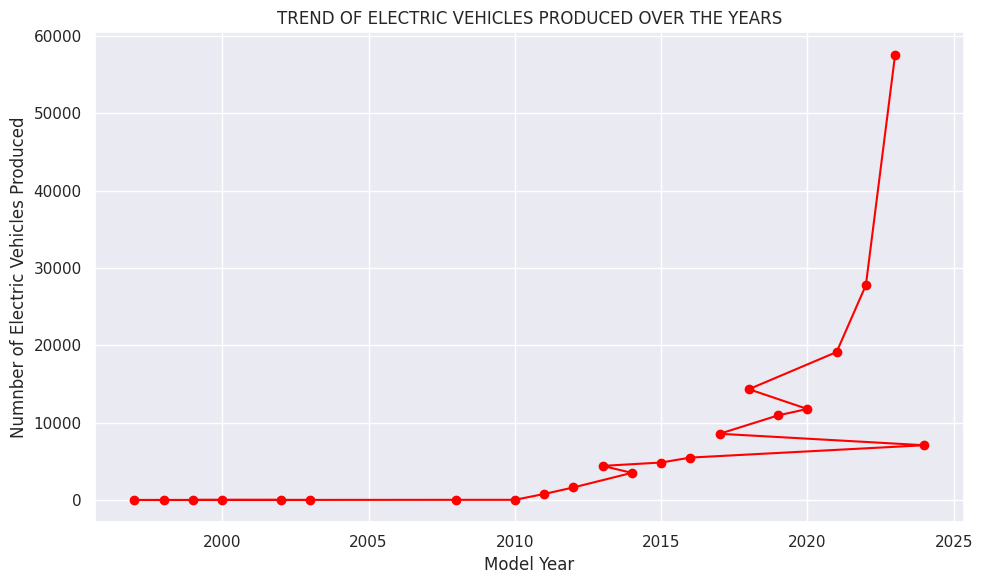

In [481]:
plt.figure(figsize=(10,6))
yearly_counts.plot(marker='o', linestyle='-', color='red')
plt.title('TREND OF ELECTRIC VEHICLES PRODUCED OVER THE YEARS')
plt.xlabel("Model Year")
plt.ylabel("Numnber of Electric Vehicles Produced")
plt.grid(True)
plt.tight_layout()
plt.show()

from above graph in the year 2000 to 2010, vehicles manufacturing was stable, then started increasing from 2011 to 2015 , then later on took a high peak in between 2020 to 2025, at somwhere around 2022 to 2023, means it is increasing gradually.


**What are the different types of electric vehicles in the dataset?**

In [482]:
ev_data.columns

Index(['State', 'Model Year', 'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP'],
      dtype='object')

In [483]:
electric_vehicle_types= ev_data['Electric Vehicle Type'].unique()
electric_vehicle_types


array(['Battery Electric Vehicle (BEV)',
       'Plug-in Hybrid Electric Vehicle (PHEV)'], dtype=object)

there are these two types of electric vehicles
'Battery Electric Vehicle (BEV)',
       'Plug-in Hybrid Electric Vehicle (PHEV)'.

**How do the different types of electric vehicles compare in terms of electric range and base MSRP?**

In [484]:
summ_stats = ev_data.groupby('Electric Vehicle Type').agg({'Electric Range':['mean','median','min','max'],
                                                   'Base MSRP':['mean','median','min','max']})

summ_stats

Electric Range                  \
                                                 mean median min  max   
Electric Vehicle Type                                                   
Battery Electric Vehicle (BEV)              66.627318    0.0   0  337   
Plug-in Hybrid Electric Vehicle (PHEV)      30.805852   28.0   6  153   

                                          Base MSRP                     
                                               mean median min     max  
Electric Vehicle Type                                                   
Battery Electric Vehicle (BEV)           916.100496    0.0   0  110950  
Plug-in Hybrid Electric Vehicle (PHEV)  1638.537873    0.0   0  845000

Battery Electric Vehicle (BEV)',
       'Plug-in Hybrid Electric Vehicle (PHEV) mean is more than other plug in hybrid vehicle , user group with the highest mean number of EVs indicates that users are using more BEVs on average, then indeed a higher mean corresponds to a higher number of EVs being used.



**Is there a correlation between base MSRP and other features such as electric range or model year?**

In [485]:
correlation_matrix = ev_data[['Base MSRP', 'Electric Range', 'Model Year']].corr()
correlation_matrix

,Base MSRP,Electric Range,Model Year
Base MSRP,1.000000,0.108231,-0.230492
Electric Range,0.108231,1.000000,-0.476852
Model Year,-0.230492,-0.476852,1.000000


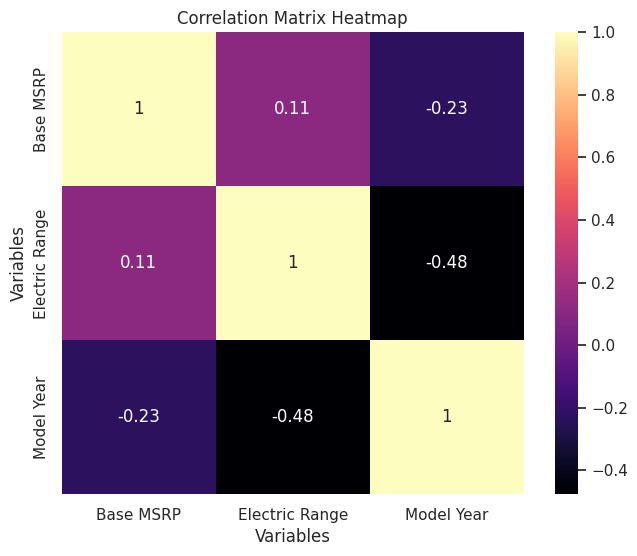

In [486]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='magma', cbar=True, square=True)

# Customize the plot
plt.title('Correlation Matrix Heatmap')
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.show()


A correlation coefficient of 1 indicates a perfect positive correlation, meaning as one variable increases, the other variable increases in a perfectly linear manner.
A correlation coefficient of -1 indicates a perfect negative correlation, meaning as one variable increases, the other variable decreases in a perfectly linear manner.
A correlation coefficient of 0 indicates no linear correlation between the variables.
There is negative correlation between them.

**What is the distribution of electric range among electric vehicles?**

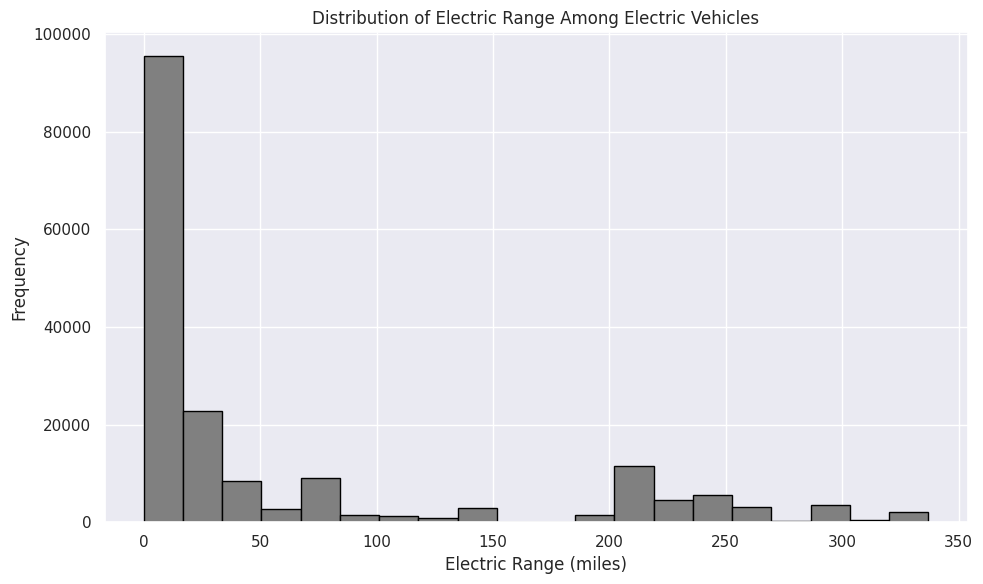

In [487]:
plt.figure(figsize=(10, 6))
plt.hist(ev_data['Electric Range'], bins=20, color='grey', edgecolor='black')
plt.title('Distribution of Electric Range Among Electric Vehicles')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

 The electric ranges are distributed across the electric vehicles in your data.From 0 to 50 highest electric ranges.This histogram has a longer tail on the right side, it indicates that a small number of vehicles have very high electric ranges compared to the majority.The right tail would indicate that there are some vehicles with significantly higher electric ranges.Spread is the electric range might vary from as low as 100 miles to as high as 350-400 miles.There is outliers present in the data.

**Correlation between Electric Range and Base MSRP: Is there any correlation between electric range and base MSRP? Visualize the relationship between electric range and base MSRP, perhaps using a scatter plot.**

In [488]:
correlation = ev_data['Electric Range'].corr(ev_data['Base MSRP'])
correlation  #  A correlation coefficient close to 1 indicates a strong positive correlation,
#meaning that as one variable increases, the other variable tends to increase as well.

0.108231209828233

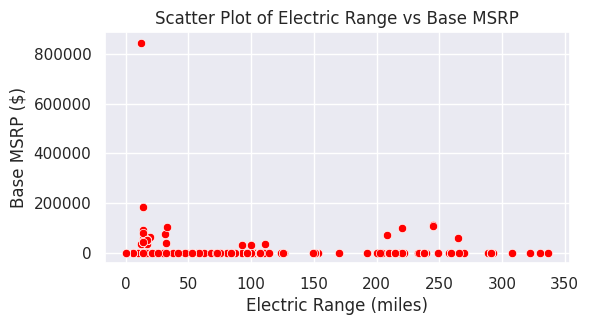

In [489]:
plt.figure(figsize=(6, 3))
sns.scatterplot(x='Electric Range', y='Base MSRP',data=ev_data, color='red')
plt.title('Scatter Plot of Electric Range vs Base MSRP')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Base MSRP ($)')
plt.show()

 a correlation coefficient of 0.1 indicates that there is almost no linear relationship between the two variables. It's important to note that correlation coefficients close to zero do not necessarily mean there is no relationship between the variables; it just means that any relationship that exists is very weak.

**Electric Vehicle Types: What are the different types of electric vehicles present in the dataset? How many vehicles belong to each type? Is there any relationship between electric vehicle type and electric range or base MSRP?**

In [490]:
ev_data['Electric Vehicle Type']

0         Battery Electric Vehicle (BEV)
1         Battery Electric Vehicle (BEV)
2         Battery Electric Vehicle (BEV)
3         Battery Electric Vehicle (BEV)
4         Battery Electric Vehicle (BEV)
                       ...              
177861    Battery Electric Vehicle (BEV)
177862    Battery Electric Vehicle (BEV)
177863    Battery Electric Vehicle (BEV)
177864    Battery Electric Vehicle (BEV)
177865    Battery Electric Vehicle (BEV)
Name: Electric Vehicle Type, Length: 177866, dtype: object

In [491]:
vehicle_type_counts = ev_data['Electric Vehicle Type'].value_counts()
vehicle_type_counts

Electric Vehicle Type
Battery Electric Vehicle (BEV)            139210
Plug-in Hybrid Electric Vehicle (PHEV)     38656
Name: count, dtype: int64

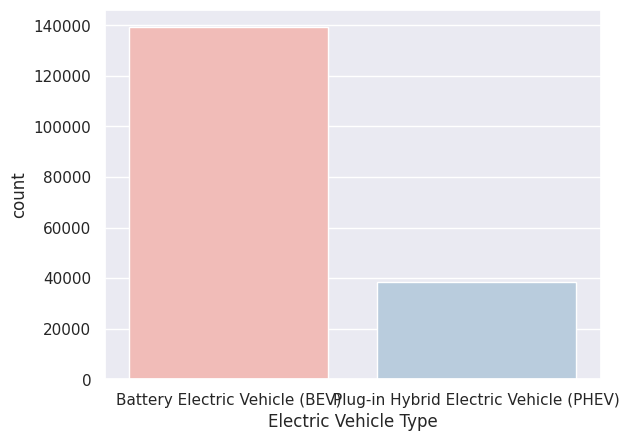

In [492]:
sns.countplot(x ='Electric Vehicle Type', data = ev_data, palette = "Pastel1")
plt.show()

Battery Electric Vehicle (BEV) count is maximum which is 139210, as compare to Plug-in Hybrid Electric Vehicle (PHEV) which 38656



In [493]:
# Visualize the counts of electric vehicle types
#plt.figure(figsize=(10, 6))
#palette = sns.color_palette("Set2")
#sns.countplot(ev_data['Electric Vehicle Type'], palette=palette)
#sns.countplot(ev_data['Electric Vehicle Type'])
#plt.title('Count of Electric Vehicle Types')
#plt.xlabel('Electric Vehicle Type')
#plt.ylabel('Count')
#plt.xticks(rotation=45)
#plt.show()

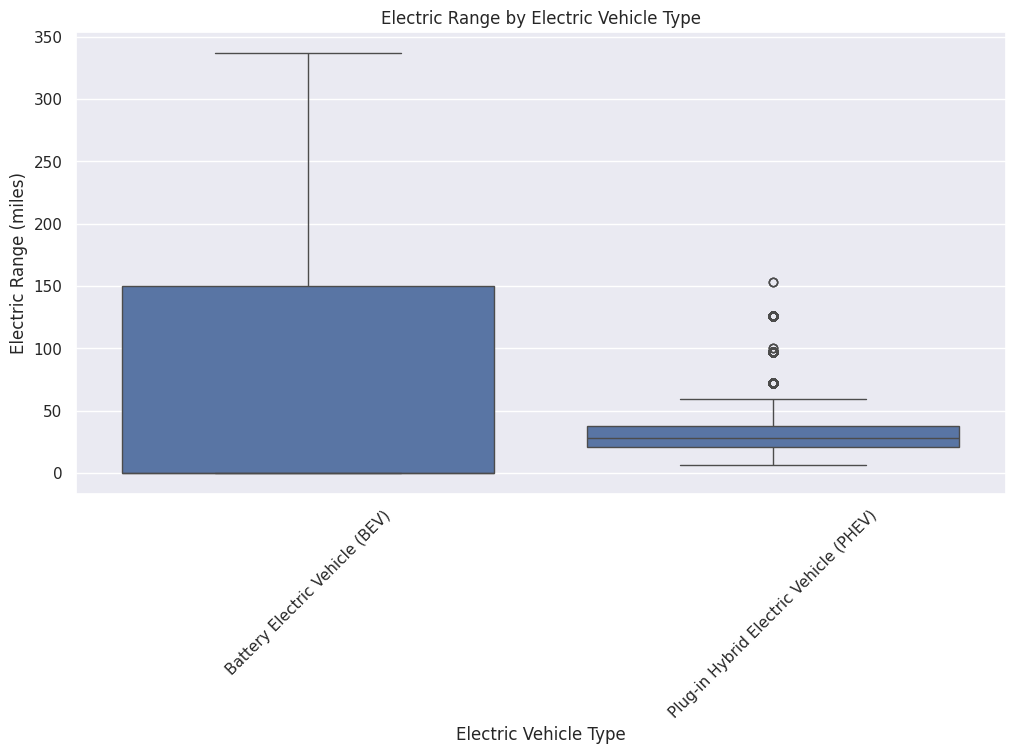

([0, 1],
 [Text(0, 0, 'Battery Electric Vehicle (BEV)'),
  Text(1, 0, 'Plug-in Hybrid Electric Vehicle (PHEV)')])

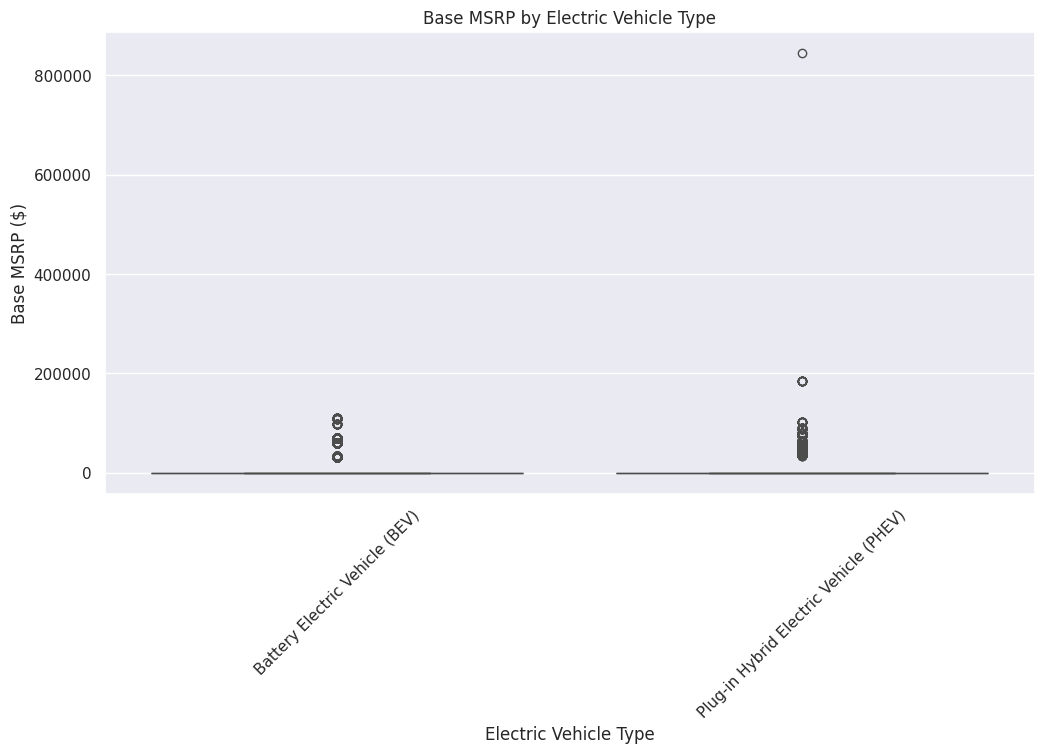

In [494]:
#Relationship between electric vehicle type and electric range/base MSRP
plt.figure(figsize=(12, 6))
sns.boxplot(x='Electric Vehicle Type', y='Electric Range', data=ev_data)
plt.title('Electric Range by Electric Vehicle Type')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Electric Range (miles)')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Electric Vehicle Type', y='Base MSRP', data=ev_data)
plt.title('Base MSRP by Electric Vehicle Type')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Base MSRP ($)')
plt.xticks(rotation=45)

from the above boxplot we getting to know about these variables are different to each other, it shows their comparison and 'Plug-in Hybrid Electric Vehicle (PHEV)'having a outliers presented.

**CAFV Eligibility: How many vehicles are eligible for the Clean Alternative Fuel Vehicle (CAFV) program? Is there any difference in electric range or base MSRP between eligible and non-eligible vehicles?**

In [495]:
ev_data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()

Clean Alternative Fuel Vehicle (CAFV) Eligibility
Eligibility unknown as battery range has not been researched    91950
Clean Alternative Fuel Vehicle Eligible                         66331
Not eligible due to low battery range                           19585
Name: count, dtype: int64

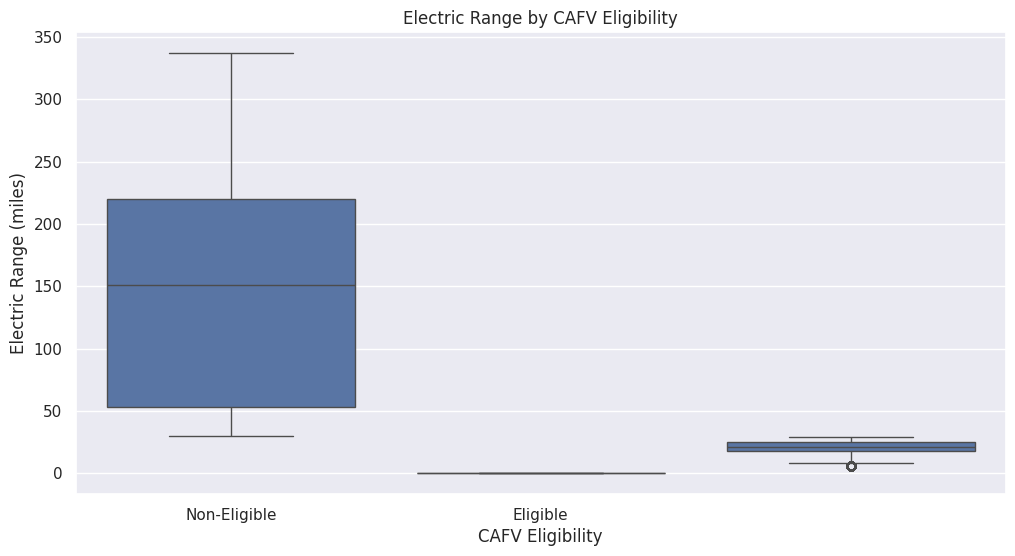

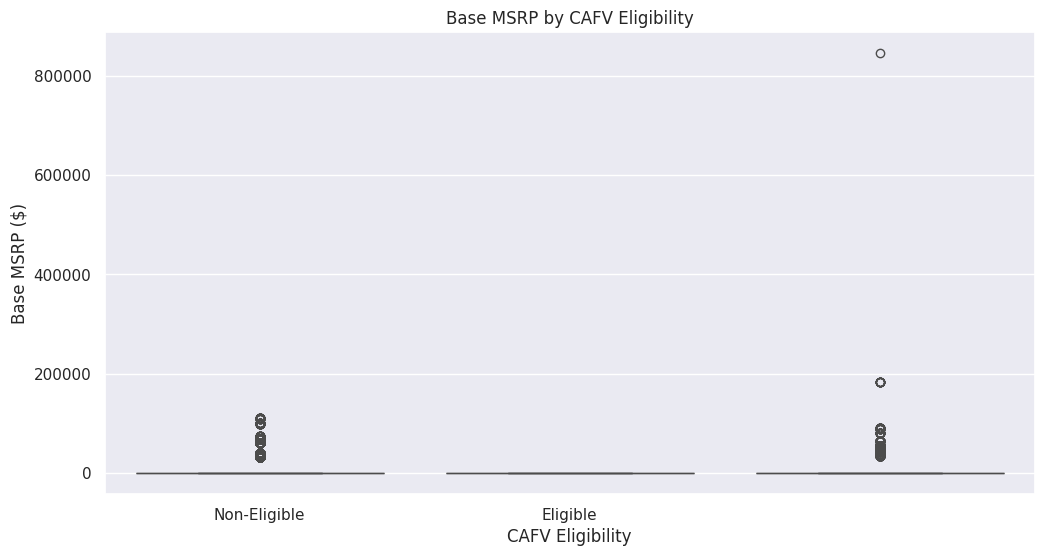

In [496]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Clean Alternative Fuel Vehicle (CAFV) Eligibility', y='Electric Range', data=ev_data)
plt.title('Electric Range by CAFV Eligibility')
plt.xlabel('CAFV Eligibility')
plt.ylabel('Electric Range (miles)')
plt.xticks([0, 1], ['Non-Eligible', 'Eligible'])
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Clean Alternative Fuel Vehicle (CAFV) Eligibility', y='Base MSRP', data=ev_data)
plt.title('Base MSRP by CAFV Eligibility')
plt.xlabel('CAFV Eligibility')
plt.ylabel('Base MSRP ($)')
plt.xticks([0, 1], ['Non-Eligible', 'Eligible'])
plt.show()

 two boxplots to shows the relationship between the Clean Alternative Fuel Vehicle (CAFV) eligibility and two variables: Electric Range and Base MSRP (Manufacturer's Suggested Retail Price).The first boxplot shows the distribution of electric range for two categories of CAFV eligibility: Non-Eligible and Eligible.For Non-Eligible vehicles (x = 0), the median electric range falls within a certain range, while the upper and lower quartiles represent the spread of the data.
For Eligible vehicles (x = 1), the median electric range falls within a different range, with its own upper and lower quartiles.at the position of the median line (the horizontal line inside the box) for each category.
Compare the position of the medians between the Non-Eligible and Eligible categories.
1.A higher median indicates that the values in that category tend to be higher.2.A longer box indicates greater variability in the data for that category.3. There is no outliers presented


**Trends over Model Years: How has electric range and base MSRP changed over different model years? Visualize trends in electric range and base MSRP over time, perhaps using line plots or bar plots.**

In [497]:
model_types= ev_data['Model'].value_counts()
model_types

Model
MODEL Y        35989
MODEL 3        30092
LEAF           13366
MODEL S         7735
BOLT EV         6821
               ...  
745LE              2
918                1
S-10 PICKUP        1
SPECTRE            1
BENTAYGA           1
Name: count, Length: 139, dtype: int64

In [498]:
model_yrs = ev_data['Model Year'].value_counts()
model_yrs

Model Year
2023    57587
2022    27776
2021    19132
2018    14323
2020    11768
2019    10940
2017     8562
2024     7080
2016     5483
2015     4844
2013     4409
2014     3509
2012     1618
2011      775
2010       23
2008       20
2000        7
1999        5
2002        2
1998        1
1997        1
2003        1
Name: count, dtype: int64

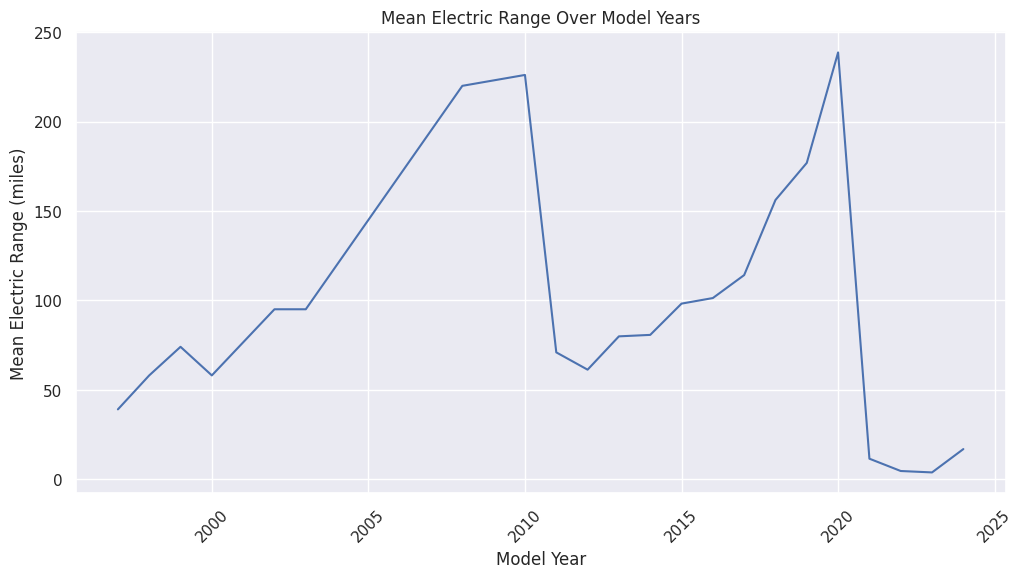

In [499]:
# Visualize trends in electric range over model years
plt.figure(figsize=(12, 6))
sns.lineplot(x='Model Year', y='Electric Range', data=ev_data, estimator='mean', ci=None)
plt.title('Mean Electric Range Over Model Years')
plt.xlabel('Model Year')
plt.ylabel('Mean Electric Range (miles)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

This line plot provides insights into how the mean electric range of electric vehicles has changed over the years.By connecting the mean electric range values for each model year, the line plot shows how the average electric range has changed over time.The slope and direction of the line indicate whether the mean electric range is increasing, decreasing, or remaining constant over the years.


 By analyzing the trend, we can understand the overall trajectory of electric range improvement or any fluctuations in the data over different model years.we can see the highest peak in 2020 to 2022 that means range was highest in that particular time period.

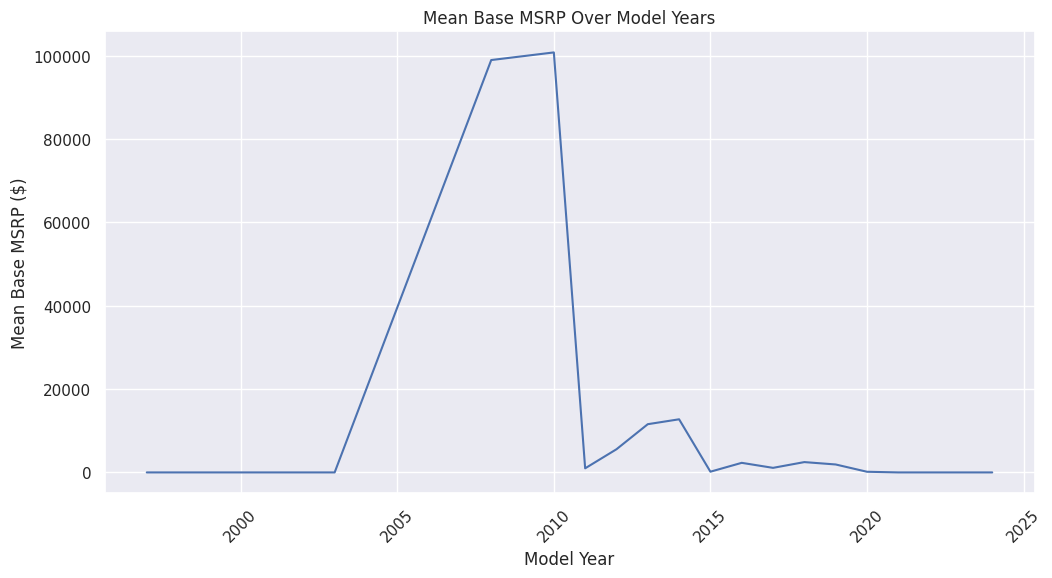

In [500]:
# Visualize trends in base MSRP over model years
plt.figure(figsize=(12, 6))
sns.lineplot(x='Model Year', y='Base MSRP', data=ev_data, estimator='mean', ci=None)
plt.title('Mean Base MSRP Over Model Years')
plt.xlabel('Model Year')
plt.ylabel('Mean Base MSRP ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


By connecting the mean Base MSRP values for each model year, the line plot illustrates how the average pricing of electric vehicles has evolved over time.
The slope and direction of the line provide insights into whether the mean Base MSRP is increasing, decreasing, or remaining relatively constant over the years.
This line plot shows us the trends in the mean Base MSRP of electric vehicles over different model years, facilitating insights into pricing dynamics and changes over time.

In [501]:
# Calculate the mean electric range and base MSRP for each model year
mean_range_by_year = ev_data.groupby('Model Year')['Electric Range'].mean().reset_index()
mean_msrp_by_year = ev_data.groupby('Model Year')['Base MSRP'].mean().reset_index()

In [502]:
mean_range_by_year

,Model Year,Electric Range
0,1997,39.000000
1,1998,58.000000
2,1999,74.000000
3,2000,58.000000
4,2002,95.000000
5,2003,95.000000
6,2008,220.000000
7,2010,226.086957
8,2011,70.891613
9,2012,61.212608


In [503]:
mean_msrp_by_year

,Model Year,Base MSRP
0,1997,0.000000
1,1998,0.000000
2,1999,0.000000
3,2000,0.000000
4,2002,0.000000
5,2003,0.000000
6,2008,98950.000000
7,2010,100781.956522
8,2011,984.516129
9,2012,5558.220025


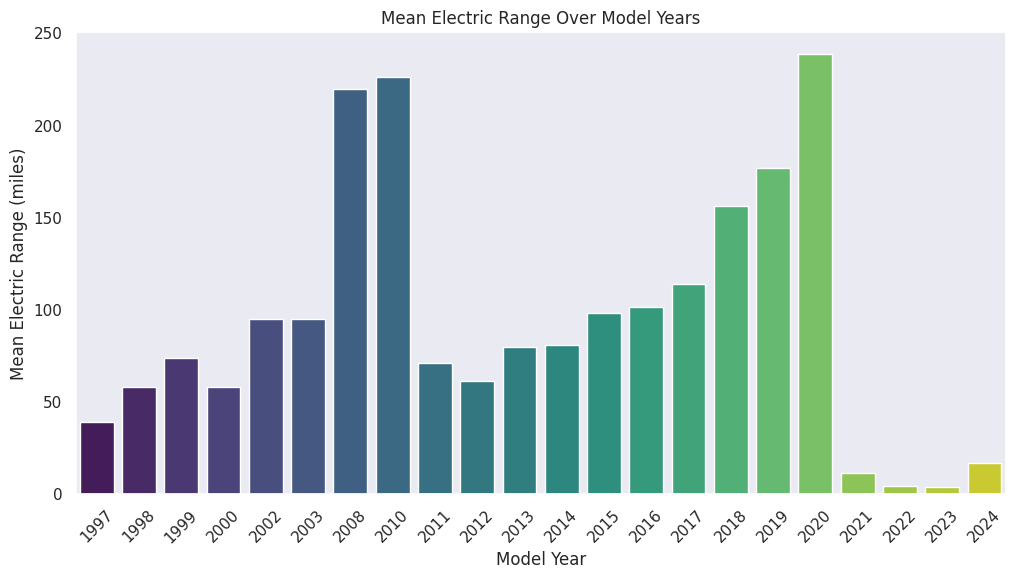

In [504]:
# Visualize trends in electric range over model years using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Model Year', y='Electric Range', data=mean_range_by_year, palette='viridis')
plt.title('Mean Electric Range Over Model Years')
plt.xlabel('Model Year')
plt.ylabel('Mean Electric Range (miles)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

The bar plot shows that the mean electric range of electric vehicles across various model years.
Each bar represents the mean electric range for a specific model year.
The height of each bar indicates the mean electric range for the corresponding model year.
By comparing the heights of the bars, you can discern differences in the mean electric range between different model years.
This bar plot provides a visual representation of the mean electric range of electric vehicles across different model years, allowing for comparisons and insights into changes in electric range over time.Higest electric range in model year 2020 and lowest in 2023.

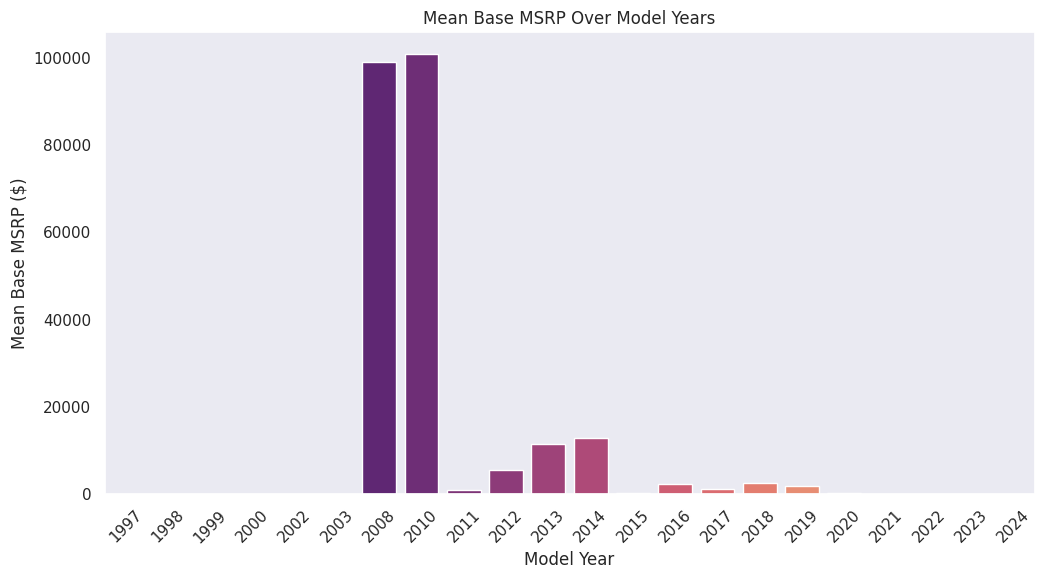

In [505]:
# Visualize trends in base MSRP over model years using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Model Year', y='Base MSRP', data=mean_msrp_by_year, palette='magma')
plt.title('Mean Base MSRP Over Model Years')
plt.xlabel('Model Year')
plt.ylabel('Mean Base MSRP ($)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

The bar plot displays the mean Base MSRP of electric vehicles across various model years.
Each bar represents the mean Base MSRP for a specific model year.The height of each bar indicates the mean Base MSRP for the corresponding model year.
By comparing the heights of the bars, you can discern differences in the mean Base MSRP between different model years.This bar plot provides a visual representation of the mean Base MSRP of electric vehicles across different model years, facilitating comparisons and insights into pricing trends over time.Highest retail price in 2010 and second highest in 2008 and lowest in 2011.

**What is the distribution of base MSRP (Manufacturer's Suggested Retail Price) among electric vehicles? Are there any noticeable patterns or outliers in the base MSRP?**



In [506]:
base_msrp = ev_data['Base MSRP']

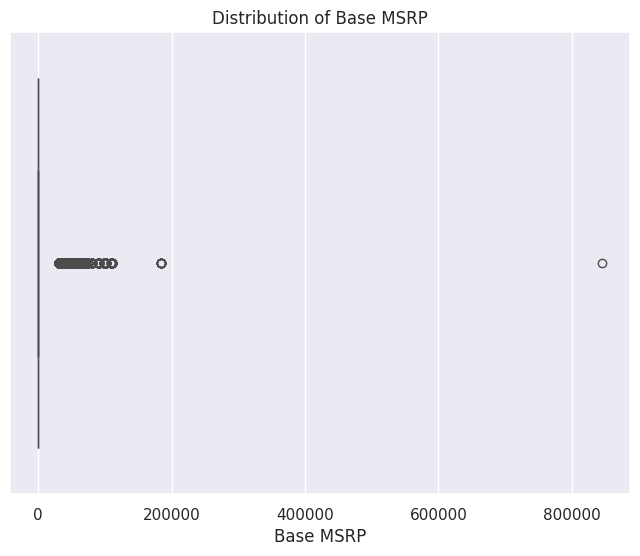

In [507]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=base_msrp)
plt.title("Distribution of Base MSRP")
plt.xlabel("Base MSRP")
plt.show()

The boxplot displays the distribution of Base MSRP (Manufacturer's Suggested Retail Price) for electric vehicles.
The box shows the interquartile range (IQR), with the median line inside the box.
The whiskers extend to the minimum and maximum values within 1.5 times the IQR from the first and third quartiles.
Any data points beyond the whiskers are considered outliers and shown individually.There is outliers presented in Base MSRP.

**What is the distribution of electric range among the electric vehicles? Are there any outliers in the electric range?**

In [508]:
electric_range = ev_data['Electric Range']

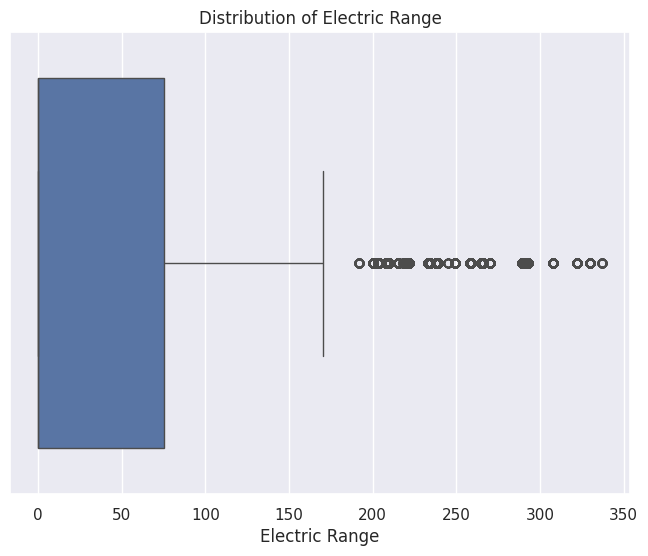

In [509]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=electric_range)
plt.title('Distribution of Electric Range')
plt.xlabel('Electric Range')
plt.show()

The box shows the interquartile range (IQR), with the median line inside the box.
The whiskers extend to the minimum and maximum values within 1.5 times the IQR from the first and third quartiles.
Any data points beyond the whiskers are considered outliers and shown individually.This boxplot provides a visual shows of the distribution of electric range values among electric vehicles, facilitating insights into the variability and potential outliers in electric range data.There are outliers presented in the Electric range.

In [510]:
#columns_of_interest = ['Electric Range', 'Base MSRP']

In [511]:
#plt.figure(figsize=(10, 6))
#sns.boxplot(data=ev_data[columns_of_interest], showfliers=True)
#plt.title('Boxplot of Electric Range and Base MSRP (With Outliers)')
##plt.xlabel('Columns')
#plt.ylabel('Values')
#plt.xticks(rotation=45)
#plt.show()

# subplotting of Base MSRP and Electric Range.These are showing in these to boxplots and we can see the their outliers together. we will treat them further.

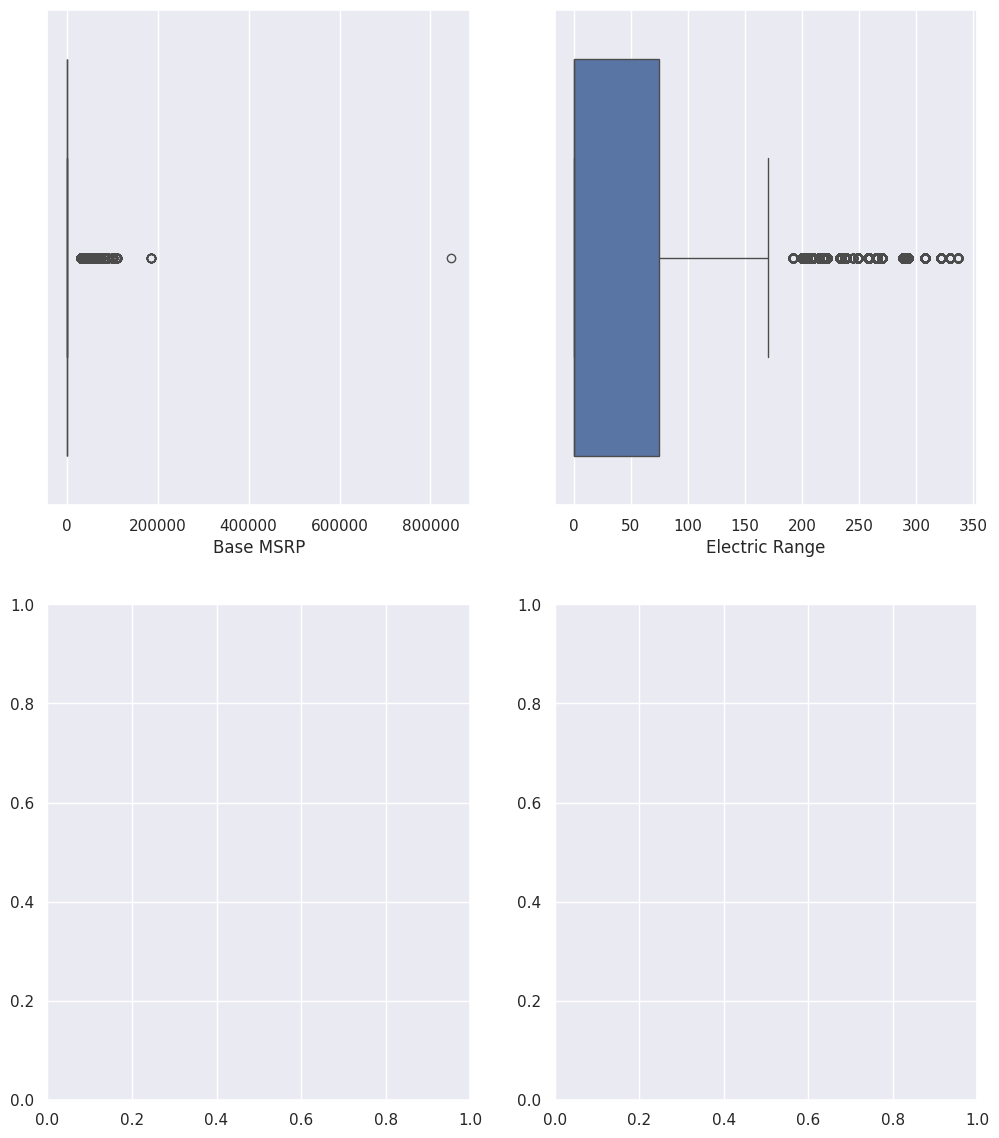

In [512]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.boxplot(data=ev_data, x="Base MSRP", orient='h', ax=axis[0,0])
sns.boxplot(data=ev_data, x="Electric Range", orient='h', ax=axis[0,1])
plt.show()

Above plots shows outliers presented in the base msrp and electric range, we have to remove them.

# Outliers Treatment.

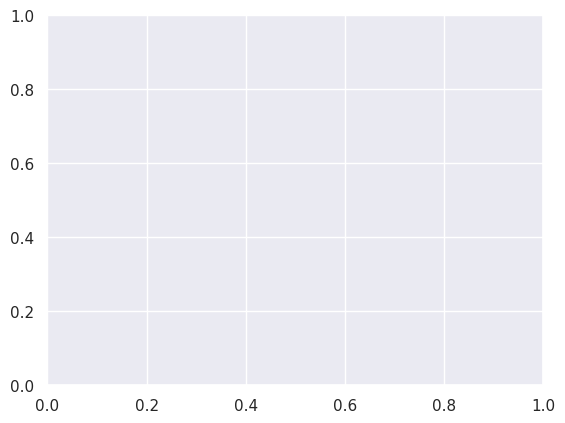

In [518]:
Q3 = ev_data['Electric Range'].quantile(0.75)
Q1 = ev_data['Electric Range'].quantile(0.25)
IQR = Q3-Q1
ev_data = ev_data[(ev_data['Electric Range'] > Q1 - 1.5*IQR) & (ev_data['Electric Range'] < Q3 + 1.5*IQR)]

sns.boxplot(data=ev_data, x="Electric Range", orient='h')
plt.show()

calculates the interquartile range (IQR) and then filters the data to remove outliers based on the electric range column. After filtering, it creates a horizontal boxplot to visualize the distribution of electric range values in the filtered data. we treated the outliers , they have been removed now from Electric range.

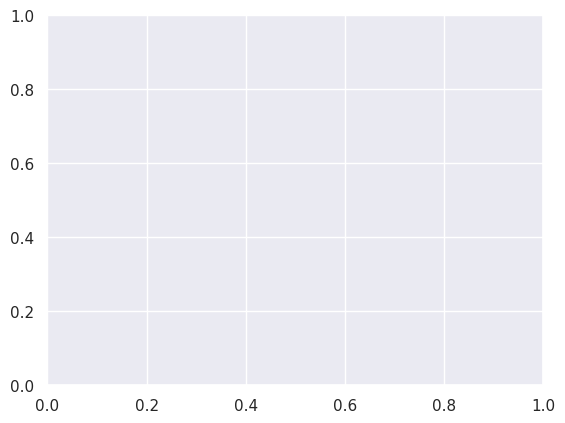

In [514]:
Q3 = ev_data['Base MSRP'].quantile(0.75)
Q1 = ev_data['Base MSRP'].quantile(0.25)
IQR = Q3-Q1
ev_data = ev_data[(ev_data['Base MSRP'] > Q1 - 1.5*IQR) & (ev_data['Base MSRP'] < Q3 + 1.5*IQR)]

sns.boxplot(data=ev_data, x="Base MSRP", orient='h')
plt.show()

calculates the interquartile range (IQR) and then filters the data to remove outliers based on the base msrp column. After filtering, it creates a horizontal boxplot to visualize the distribution of electric range values in the filtered data. we treated the outliers , they have been removed now from Base MSRP.

# removed outliers together.

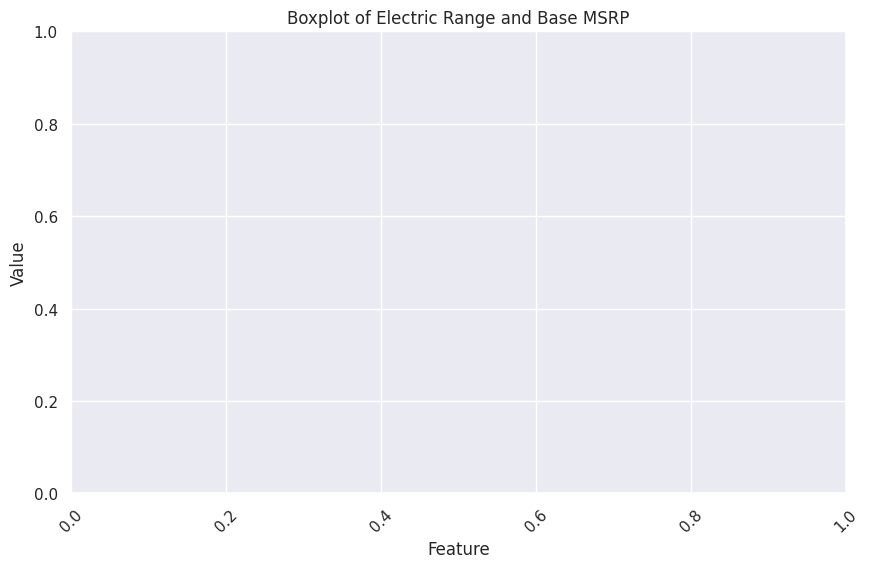

In [517]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=ev_data[['Electric Range', 'Base MSRP']])
plt.title('Boxplot of Electric Range and Base MSRP')
plt.ylabel('Value')
plt.xlabel('Feature')
plt.xticks(rotation=45)
plt.show()
